# Feature Scaling (Escalonamento dos Dados)

No Machine Learning, muitos algoritmos podem ser sensíveis às escalas dos dados, podendo se confundir e considerar que escalas maiores são mais relevantes do que as variáveis de escalas menores, e vice versa.

> Escalas dos dados referem-se à amplitude ou intervalo dos valores de um conjunto numérico dos dados.

A técnica Feature Scaling é o processo de normalizar as escalas das features, colocando-as em uma escala comum. Duas abordagens comuns para aplicar a técnica:

*   Normalização (min-max scaling)
*   Padronização (z-score normalization)
------

## Modelo de Churn

Vamos criar um modelo preditivo para prever se o cliente vai deixar o banco, testando nossos dados com e sem escalonamento.
Vamos focar em padronização e normalização. <br><br>

Vamos realizar o upload dessa base de dados para começar a construir o modelo.

In [7]:
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv', sep=';')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9865 entries, 0 to 9864
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9865 non-null   int64  
 1   CustomerId       9865 non-null   int64  
 2   Surname          9865 non-null   object 
 3   CreditScore      9865 non-null   int64  
 4   Geography        9865 non-null   object 
 5   Gender           9865 non-null   object 
 6   Age              9865 non-null   int64  
 7   Tenure           9865 non-null   int64  
 8   Balance          9865 non-null   float64
 9   NumOfProducts    9865 non-null   int64  
 10  HasCrCard        9865 non-null   int64  
 11  IsActiveMember   9865 non-null   int64  
 12  EstimatedSalary  9865 non-null   float64
 13  Exited           9865 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Vemos que existem dados em formato de String (categorias). Devemos transformá-los em números inteiros para que o computador possa compreender o que estamos querendo apresentar, e como os computadores entendem apenas números, vamos realizar essa transformação para os algoritmos de ML sejam utilizados da forma mais adequada. <br>

Com o LabelEncoder, conseguimos transformar rótulos de classes em números inteiros.

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustando e transformando os rótulos
df['Surname'] = label_encoder.fit_transform(df['Surname'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1111,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1173,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2032,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1816,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(9865, 14)

Temos 14 features nessa base de dados.
Dentre elas, muitas possuem proporções diferentes quando analisamos as escalas dos dados, por exemplo idade, salário, número de posse do cliente, número de produtos, score de crédito, e assim por diante. Cada um está em uma ordem de grandeza diferente.
<br><br>
Vamos plotar alguns bloxplots para analisarmos como está a distribuição dessas variáveis quantitativas para descobrirmos a **variação de amplitude** dos dados:

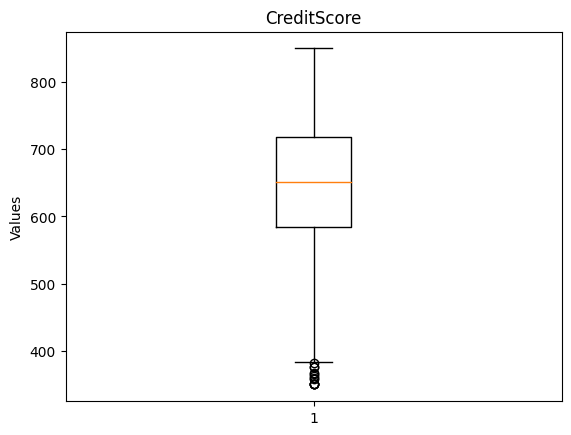


Min: 350
Max: 850


In [25]:
import matplotlib.pyplot as plt

plt.boxplot(df['CreditScore'])
plt.title('CreditScore')
plt.ylabel('Values')

plt.show()
print('\nMin:', df['CreditScore'].min())
print('Max:',df['CreditScore'].max())

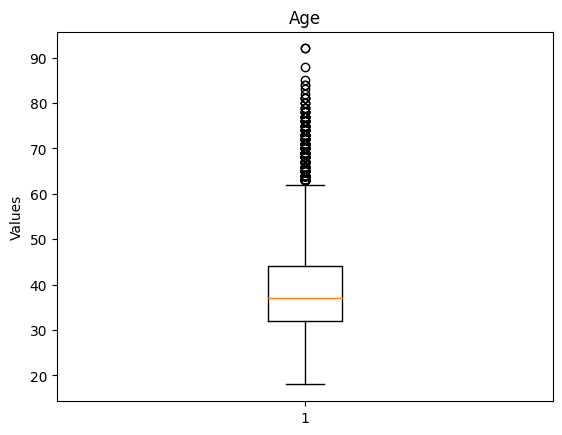


Min: 18
Max: 92


In [26]:
plt.boxplot(df['Age'])
plt.title('Age')
plt.ylabel('Values')

plt.show()
print('\nMin:', df['Age'].min())
print('Max:', df['Age'].max())

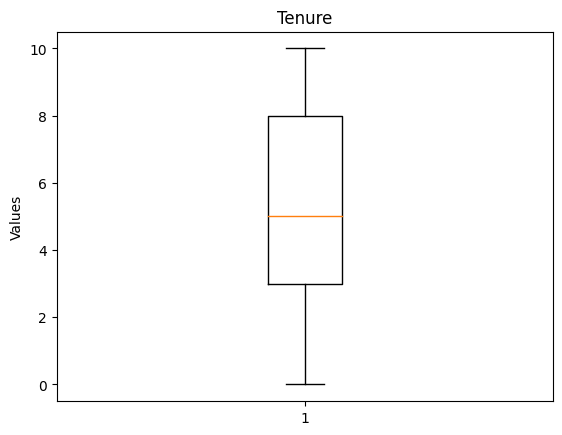


Min: 0
Max: 10


In [28]:
plt.boxplot(df['Tenure'])
plt.title('Tenure')
plt.ylabel('Values')

plt.show()

print('\nMin:', df['Tenure'].min())
print('Max:', df['Tenure'].max())

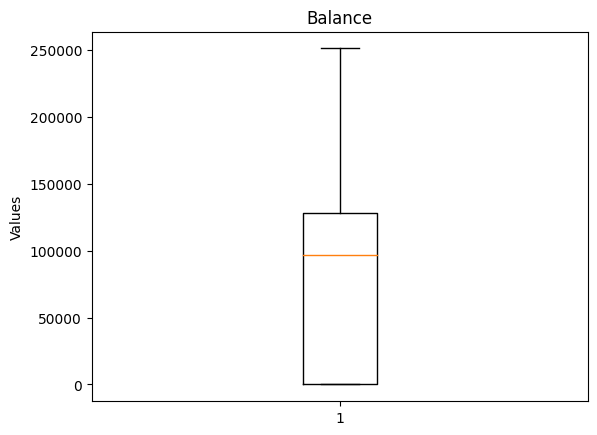


Min: 0.0
Max: 250898.09


In [29]:
plt.boxplot(df['Balance'])
plt.title('Balance')
plt.ylabel('Values')

plt.show()
print('\nMin:', df['Balance'].min())
print('Max:', df['Balance'].max())

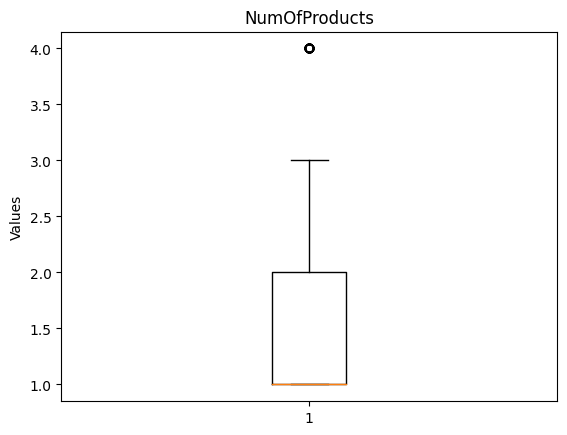


Min: 1
Max: 4


In [30]:
plt.boxplot(df['NumOfProducts'])
plt.title('NumOfProducts')
plt.ylabel('Values')

plt.show()
print('\nMin:', df['NumOfProducts'].min())
print('Max:', df['NumOfProducts'].max())

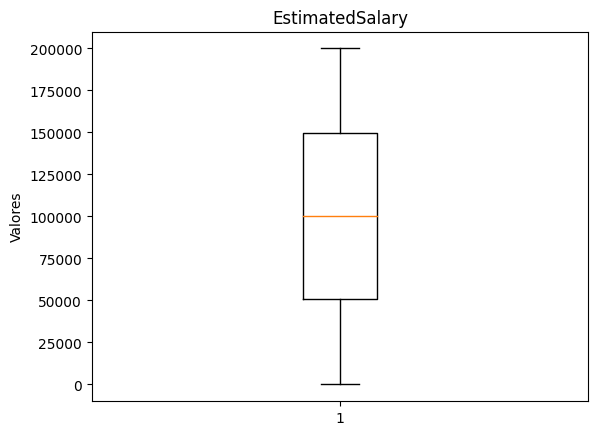


Min: 11.58
Max: 199992.48


In [31]:
plt.boxplot(df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.ylabel('Valores')

plt.show()
print('\nMin:', df['EstimatedSalary'].min())
print('Max:', df['EstimatedSalary'].max())

Após avaliar os gráficos boxplot e seus devidos valores min e max, concluímos que as escalas são bem diferentes uma das outras. <br>

Antes de normalizar ou padronizar, vamos eparar os dados em treino e teste:

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited']) # Variáveis características
y = df['Exited'] # O que eu quero prever (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos escalonar os dados.
Importamos os escalonadores da lib sklearn em preprocessing o StandardScaler e MinMaxScaler:

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

O escalonamento min-max (normalização) é muito simples! Basicamente os valores são deslocados e redimensionados para que acabem variando de 0 a 1. Observe a fórmula a seguir, esse cálculo subtrai o valor mínimo e divide pelo máximo, menos o mínimo.

In [39]:
scaler = MinMaxScaler() # Classe de normalização dos dados (0-1)

scaler.fit(X_train)

x_train_min_max_scaled = scaler.transform(X_train)
x_test_min_max_scaled= scaler.transform(X_test)

In [40]:
x_train_min_max_scaled

array([[0.35201121, 0.11669547, 0.88507719, ..., 1.        , 0.        ,
        0.34768845],
       [0.60456274, 0.78062996, 0.35849057, ..., 1.        , 0.        ,
        0.46923837],
       [0.89393636, 0.07744496, 0.17495712, ..., 0.        , 1.        ,
        0.56001428],
       ...,
       [0.53922353, 0.03258209, 0.5626072 , ..., 0.        , 0.        ,
        0.46092526],
       [0.08595157, 0.96788994, 0.59691252, ..., 1.        , 0.        ,
        0.48738065],
       [0.7273364 , 0.56228399, 0.84425386, ..., 1.        , 1.        ,
        0.26761502]])

Mas você deve estar se perguntando:
> Por que é realizado o escalonamento (fit) na base treino e não na base de teste?

Bem, realizamos a transformação do escalonamento na base de treino para evitar que a base de teste fique exatamente igual às estatísticas da base de treino, o que evita “vazamento” desses dados. A base de teste em geral deve representar uma base de dados nunca vista antes pelo algoritmo, justamente para testar se o algoritmo consegue generalizar os dados. <br>

A padronização não vincula valores específicos nos mínimos e máximos, o que pode ser um ponto de atenção em alguns algoritmos (por exemplo, redes neurais). No entanto, a padronização é muito menos afetada por outliers. Na biblioteca do Scikit-Learn temos a padronização em StandardScaler.

In [41]:
scaler = StandardScaler() # Classe de padronização dos dados (média e std)

scaler.fit(X_train)

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

In [42]:
x_train_standard_scaled

array([[-0.50073964, -1.33102082,  1.28295781, ...,  0.64920701,
        -1.04034701, -0.53624445],
       [ 0.38340744,  0.98483691, -0.54107698, ...,  0.64920701,
        -1.04034701, -0.11539063],
       [ 1.39646344, -1.46792981, -1.17681548, ..., -1.54034073,
         0.96121774,  0.19891141],
       ...,
       [ 0.15466416, -1.62441517,  0.16595931, ..., -1.54034073,
        -1.04034701, -0.1441739 ],
       [-1.43217667,  1.63801503,  0.28478893, ...,  0.64920701,
        -1.04034701, -0.05257492],
       [ 0.81322062,  0.22322832,  1.14155055, ...,  0.64920701,
         0.96121774, -0.81349026]])

In [43]:
from sklearn.neighbors import KNeighborsClassifier

Vamos testar o algoritmo sem os escalonadores e validar os resultados!

In [44]:
model = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.76


Testando com a normalização:

In [46]:
model_min_max = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_min_max = model.predict(x_test_min_max_scaled)

accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
print(f'Acurácia: {accuracy_min_max:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Acurácia: 0.81


Testando com a padronização:

In [47]:
model_standard = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_standard.fit(x_train_standard_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_standard = model.predict(x_test_standard_scaled)

accuracy_strandard = accuracy_score(y_test, y_pred_standard)
print(f'Acurácia: {accuracy_strandard:.2f}')

Acurácia: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
